# Statistical and Machine Learning Approaches for Marketing
**INDIVIDUAL ASSIGNMENT** 

**NAME :** Harikrishnan Gopalakrishnan

## Benchmark Experiment
**Workflow stages:**

The notebook mainly focuses on the following experimental setup of the given data: 

1. Variable Selection	
2. Model Building	
3. Cross Validation	
4. Hyper Paramater Tuning	
5. Evaluation Metrics	

## Question and problem definition

The Data set is from a Taiwan banking institution to predict the default of credit card of clients . Specifically, the classification goal is to predict if the client will be able to pay the credit in the upcoming month

In [1]:
# Data Analysis
import numpy             as np
import pandas            as pd
import datetime
from datetime            import datetime, timedelta
import statistics        as st

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
import sys
from sklearn.linear_model      import LogisticRegression
from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier
from sklearn.ensemble          import GradientBoostingClassifier
from sklearn.svm               import SVC
from sklearn.neural_network    import MLPClassifier
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.metrics           import accuracy_score
from sklearn.metrics           import auc
from sklearn.metrics           import roc_auc_score
from scipy.stats               import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection   import train_test_split

## Acquire Data
We begin by reading in the dataset into Pandas.


In [2]:
#read the data
train = pd.read_csv('./data/credit_default_train.csv')

## Cleaning and Describing Data
Before we can analyze our data and create a base table we have to analyze the table and make the required  data cleaning.

In [3]:
train.head()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [4]:
#to get the variable datatypes
print(train.shape)
train.dtypes

(20000, 25)


cust_id                         int64
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [5]:
#summary statistics
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cust_id,20000.0,15008.050800,8679.933160,2.0,7471.25,15003.0,22532.5,30000.0
LIMIT_BAL,19798.0,166701.872916,129493.677795,10000.0,50000.00,140000.0,240000.0,1000000.0
SEX,19839.0,1.604063,0.489063,1.0,1.00,2.0,2.0,2.0
EDUCATION,19801.0,1.851927,0.789254,0.0,1.00,2.0,2.0,6.0
MARRIAGE,19830.0,1.555371,0.521595,0.0,1.00,2.0,2.0,3.0
AGE,19786.0,35.476347,9.233460,21.0,28.00,34.0,41.0,75.0
PAY_0,19805.0,-0.020096,1.115072,-2.0,-1.00,0.0,0.0,8.0
PAY_2,19781.0,-0.130681,1.196540,-2.0,-1.00,0.0,0.0,8.0
PAY_3,19783.0,-0.166153,1.200058,-2.0,-1.00,0.0,0.0,8.0
PAY_4,19801.0,-0.222666,1.171144,-2.0,-1.00,0.0,0.0,8.0


In [6]:
#Check for null values
train.isna().sum()

cust_id                         0
LIMIT_BAL                     202
SEX                           161
EDUCATION                     199
MARRIAGE                      170
AGE                           214
PAY_0                         195
PAY_2                         219
PAY_3                         217
PAY_4                         199
PAY_5                         185
PAY_6                         203
BILL_AMT1                     185
BILL_AMT2                     209
BILL_AMT3                     175
BILL_AMT4                     165
BILL_AMT5                     181
BILL_AMT6                     197
PAY_AMT1                      204
PAY_AMT2                      184
PAY_AMT3                      212
PAY_AMT4                      197
PAY_AMT5                      179
PAY_AMT6                      196
default.payment.next.month      0
dtype: int64

In [7]:
#To check the unique values
print(train.SEX.unique())
print(train.EDUCATION.unique())
print(train.MARRIAGE.unique())

[ 1.  2. nan]
[ 3.  2.  1. nan  5.  4.  6.  0.]
[ 2.  1.  3. nan  0.]


In [8]:
#fill the missing values as zero
train = train.fillna(0)

In [9]:
# Rename the variable 'PAY_0' to 'PAY_1' 
train.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
# rename target variable: 'default.payment.next.month' to 'Default'
train.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

In [10]:
train.head()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [11]:
#Drop the column "cust_id"
#train.drop('cust_id',axis = 1,inplace=True)

In [12]:
# Class label to category
train["Default"] = train["Default"].astype('category')

In [13]:
#Removing the unknown and null values 
train = train.drop(train[train['LIMIT_BAL']==0].index)
train = train.drop(train[train['SEX']==0].index)
train = train.drop(train[train['MARRIAGE']==0].index)
#Removing the unknown values in Education column
train = train.drop(train[train['EDUCATION']==0].index)
train = train.drop(train[train['EDUCATION']==5].index)
train = train.drop(train[train['EDUCATION']==6].index)

In [14]:
#Repayment status to be changed as per description values
print(train.PAY_1.unique())
print(train.PAY_2.unique())
print(train.PAY_3.unique())
print(train.PAY_4.unique())
print(train.PAY_5.unique())
print(train.PAY_6.unique())

[ 0.  2. -2. -1.  1.  3.  4.  8.  5.  6.  7.]
[ 0.  2. -2. -1.  3.  4.  7.  5.  1.  6.  8.]
[ 0.  2. -2. -1.  3.  4.  6.  7.  5.  8.  1.]
[ 0.  2. -1. -2.  5.  7.  4.  3.  6.  1.  8.]
[ 0.  2. -2. -1.  4.  7.  3.  5.  6.  8.]
[ 0.  2. -2. -1.  3.  7.  4.  6.  5.  8.]


<b>The repayment status values have to be in (-1,1,2,3,4,5,6,7,8,9 and above).So remove the other records in the repayment status columns

In [15]:
for col in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  # Grouping to single class:-1
  filter = (train[col] == -2) | (train[col] == -1) 
  train.loc[filter, col] = -1
 
  # the category 0 is unknown,so each category >= 0 has been updated by adding 1
  train[col] = train[col].astype('int64')
  filter = (train[col] >= 0)
  train.loc[filter, col] = train.loc[filter, col] + 1

## Data preprocessing

In [16]:
#Changing the records as per the train description for futher analysis
for values in ['SEX', 'EDUCATION', 'MARRIAGE']:
  train[values] = train[values].astype('category')

In [17]:
#One-hot encoding
train=pd.concat([pd.get_dummies(train['SEX'], prefix='SEX'),
                pd.get_dummies(train['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(train['MARRIAGE'], prefix='MARRIAGE'),
                train],axis=1)

In [18]:
# drop original columns
train.drop(['EDUCATION'],axis=1, inplace=True)
train.drop(['SEX'],axis=1, inplace=True)
train.drop(['MARRIAGE'],axis=1, inplace=True)

In [19]:
# print the data
train.head()

,SEX_1.0,SEX_2.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,cust_id,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,0,0,0,1,0,0,1,0,18895,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,0,1,0,1,0,0,0,1,0,25102,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,1,0,1,0,0,0,0,1,0,28867,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,0,1,0,1,0,0,1,0,0,1842,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,1,0,1,0,0,0,0,1,0,3371,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [20]:
train.columns

Index(['SEX_1.0', 'SEX_2.0', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'MARRIAGE_3.0',
       'cust_id', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [21]:
# rename the columns 
dict = {'SEX_1.0': 'male',
        'SEX_2.0': 'female',
        'EDUCATION_1.0': 'Graduate_school',
        'EDUCATION_2.0': 'university',
        'EDUCATION_3.0': 'high_school',
        'EDUCATION_4.0': 'edu_others',
        'MARRIAGE_1.0': 'married',
        'MARRIAGE_2.0': 'single',
        'MARRIAGE_3.0': 'marr_others',
       }
train.rename(columns=dict,
          inplace=True)

In [22]:
train.head()

,male,female,Graduate_school,university,high_school,edu_others,married,single,marr_others,cust_id,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,0,0,0,1,0,0,1,0,18895,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,0,1,0,1,0,0,0,1,0,25102,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,1,0,1,0,0,0,0,1,0,28867,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,0,1,0,1,0,0,1,0,0,1842,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,1,0,1,0,0,0,0,1,0,3371,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


## Export the basetable in csv file

In [23]:
#write files
train.to_csv(r'./basetable/final_basetable.csv',index=False)

## Train-Test Data Split for Data Modeling

In [24]:
#Define features and target
features = list(train.drop(["Default"],1).columns)
target = 'Default'

In [25]:
# Separating the features and target
X, y = train[features], train[target]

In [26]:
#Train-test Data split
from sklearn.model_selection import train_test_split

trainingSet, testSet, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state=50)

In [27]:
print(trainingSet.shape)
print(testSet.shape)

(13316, 30)
(5708, 30)


In [28]:
trainingSet.columns

Index(['male', 'female', 'Graduate_school', 'university', 'high_school',
       'edu_others', 'married', 'single', 'marr_others', 'cust_id',
       'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## Feature Selection

<b>Univariate selection is used.In this method ,statistical tests can be used to select those features that have the strongest relationship with the output variable

In [29]:
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

           Features        Score
12            PAY_1  1619.032218
13            PAY_2  1120.300108
14            PAY_3   952.294120
15            PAY_4   810.424574
16            PAY_5   737.271665
17            PAY_6   599.951833
10        LIMIT_BAL   423.755436
24         PAY_AMT1   109.358577
27         PAY_AMT4    80.749450
28         PAY_AMT5    72.286806
25         PAY_AMT2    68.716598
26         PAY_AMT3    58.782693
29         PAY_AMT6    57.133830
2   Graduate_school    44.963815
0              male    23.859334


In [30]:
#top features are sorted based on their scores
featureScores = featureScores.sort_values(by='Score',ascending = False)
top_features_df = featureScores['Features'].head(15)
top_features = list(top_features_df)
top_features

['PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'LIMIT_BAL',
 'PAY_AMT1',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT6',
 'Graduate_school',
 'male']

## Model Building

Since it is a classification problem,I have chosen 5 classification algorithms to fit the model.The algorithms are as follows:
1.	Logistic Regression
2.	Random Forests
3.	Gradient Boosting
4.	K-Nearest Neighbour
5.	Support Vector Machines

In [31]:
#ML models
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=10)
svm          = SVC(gamma = "scale", probability = True)
neighbors    = KNeighborsClassifier()
models = {
          "Logistic_Regression"     :logistic,
          "Random_Forest" :randomForest,
          "Gradient_Boosting"  :boostedTree,
          "Support_Vector_Machines" :svm,
          "K-Nearest_Neighbour"  :neighbors
         }
performances = {}

In [32]:
for model in models:
    models[model].fit(trainingSet[top_features],y_train)


In [33]:
for model in models:
    predictions   = models[model].predict(testSet[top_features])
    probabilities = pd.DataFrame(models[model].predict_proba(testSet[top_features]))[1]
    accuracy      = accuracy_score(y_test,predictions)
    auc           = roc_auc_score(np.array(y_test),np.array(probabilities))
    performances[model] = {"Accuracy":accuracy,"AUC":auc}
    cv = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

In [34]:
pd.DataFrame(performances)

,Logistic_Regression,Random_Forest,Gradient_Boosting,Support_Vector_Machines,K-Nearest_Neighbour
Accuracy,0.777680,0.807814,0.810967,0.777680,0.753679
AUC,0.638573,0.732062,0.750411,0.438669,0.599313


## Cross-Validation

<b>-cross_val_score  function is used to estimate the ‘auc’ of the ML algorithms on the credit card default dataset by splitting the data, fitting a model and computing the auc score 5 consecutive times (with different splits each time)

In [35]:
#Gradient Boosting
from sklearn.model_selection import cross_val_score


crossval_scores1 = cross_val_score(boostedTree, trainingSet[top_features],y_train , scoring='roc_auc', cv=5)
crossval_scores1

array([0.77055112, 0.7690305 , 0.7421821 , 0.77396675, 0.76028848])

In [36]:
#Logistic Regression
from sklearn.model_selection import cross_val_score


crossval_scores2 = cross_val_score(logistic , trainingSet[top_features],y_train , scoring='roc_auc', cv=5)
crossval_scores2

array([0.61533567, 0.64096043, 0.64472624, 0.62685109, 0.6511963 ])

In [37]:
#Random Forests
from sklearn.model_selection import cross_val_score


crossval_scores3 = cross_val_score(randomForest , trainingSet[top_features],y_train , scoring='roc_auc', cv=5)
crossval_scores3

array([0.75892368, 0.74469998, 0.73163384, 0.7590328 , 0.73911978])

In [38]:
#KNN
from sklearn.model_selection import cross_val_score


crossval_scores4 = cross_val_score(neighbors , trainingSet[top_features],y_train , scoring='roc_auc', cv=5)
crossval_scores4

array([0.59217576, 0.60957993, 0.58817918, 0.5896457 , 0.60199326])

In [39]:
#SVM
from sklearn.model_selection import cross_val_score


crossval_scores5 = cross_val_score(svm , trainingSet[top_features],y_train , scoring='roc_auc', cv=5)
crossval_scores5

array([0.54873417, 0.5846911 , 0.55852539, 0.45868664, 0.56080143])

In [40]:
#print all the auc values of the ML models obtained from CV method in the form of dataframe
d=pd.DataFrame(crossval_scores5)
d.drop([0],axis=1,inplace=True)
d['SVM']=pd.DataFrame(crossval_scores5)
d['KNN']=pd.DataFrame(crossval_scores4)
d['Random_forests']=pd.DataFrame(crossval_scores3)
d['Logistic Regression']=pd.DataFrame(crossval_scores2)
d['Gradient Boosting']=pd.DataFrame(crossval_scores1)
d

,SVM,KNN,Random_forests,Logistic Regression,Gradient Boosting
0,0.548734,0.592176,0.758924,0.615336,0.770551
1,0.584691,0.609580,0.744700,0.640960,0.769030
2,0.558525,0.588179,0.731634,0.644726,0.742182
3,0.458687,0.589646,0.759033,0.626851,0.773967
4,0.560801,0.601993,0.739120,0.651196,0.760288


<b>From the above metrics we can observe that Gradient boosting is the best model to fit and classify the class for target :Default for the credit card dataset.

## Hyper-Paramater Tuning for selected Model

In [41]:
#Hyperparameter Tuning
param_grid = {'n_estimators': [100,200,300], 'learning_rate':[0.01,0.02,0.03]}
gs = GridSearchCV(boostedTree, param_grid, cv=cv, scoring='accuracy', return_train_score=True)

#fit the function
gs.fit(trainingSet, y_train)

#get the best params
print(gs.best_params_)

{'learning_rate': 0.03, 'n_estimators': 300}


<b>Selected Model:Gradient Boosting

In [42]:
# Gradient Classifier
boostedTree  = GradientBoostingClassifier(n_estimators=300, learning_rate= 0.03, max_depth=1,)
boostedTree = boostedTree.fit(trainingSet[top_features].values, y_train)

# predict probabilities
pred_train = boostedTree.predict_proba(trainingSet[top_features].values)
pred_test = boostedTree.predict_proba(testSet[top_features].values)

# evaluate predictions
acc_train = accuracy_score(y_train, np.argmax(pred_train, axis=1))
acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))
aucTraining = roc_auc_score(y_train,pred_train[:,1])
aucTest = roc_auc_score(y_test,pred_test[:,1])

print(f"Accuracy Train:\tACC={acc_train:.4f}")
print(f"Accuracy Test:\tACC={acc_test:.4f}")
print(f"AUC Train:\tACC={aucTraining:.4f}")
print(f"AUC Test:\tACC={aucTest:.4f}")

Accuracy Train:	ACC=0.8159
Accuracy Test:	ACC=0.8120
AUC Train:	ACC=0.7748
AUC Test:	ACC=0.7524


## Evaluation Metrics

<b>AUC-ROC Curve

AUC Score for GradientBoostingClassifier(learning_rate=0.03, max_depth=1, n_estimators=300) 0.75


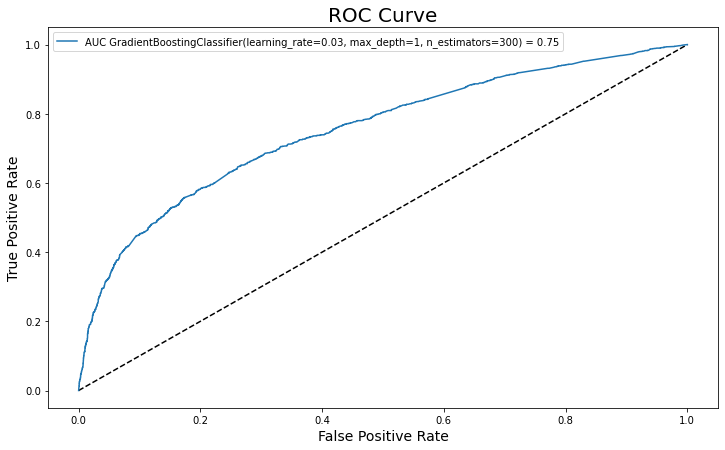

In [44]:
from sklearn.metrics        import roc_auc_score, roc_curve

plt.figure(figsize=(12, 7))
x = boostedTree.predict_proba(testSet[top_features])[:, 1]
y = roc_auc_score(y_test, x)
fpr, tpr, thresholds = roc_curve(y_test, x)
print('AUC Score for', boostedTree, round(y,2))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC {boostedTree} = {y:.2f}')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

<b>0.75 AUC signifies that Gradient Boosting model has 75% probable chance of separating the classes (Default : Yes or no) in the dataset.